# Bike Sharing Assignment

### Import Necessary Libraries

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## STEP 1 :
- Read and Understand the Data

In [187]:
bike = pd.read_csv(r"C:\Users\10130667\OneDrive - NTT DATA Business Solutions AG\AI-ML\ML Python\day.csv")

In [188]:
#Check the data of the top 5 rows 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
#Check the number of rows and columns
bike.shape

(730, 16)

In [190]:
#Check for Null Values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### There are no Null values in any columns in the Dataframe

In [191]:
#Check the standard calculations of the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## STEP 2 :
- Clean Dataframe by dropping unwanted columns
- Here the first 2 columns are not required. For Date we already have it segregated in year, month and weekday
- Create Pair Plots and Heat Map
- Create Dummy Variables for Categorical ones

In [192]:
bike = bike.drop(['instant', 'dteday'], axis = 1)

In [193]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [194]:
#Drop Casual and Registered columns as Count(Cnt) is a sum of both. So they are redundant
bike = bike.drop(['casual', 'registered'], axis = 1)

In [195]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Create Pair Plot and Box Plots(for Categorical Variables)

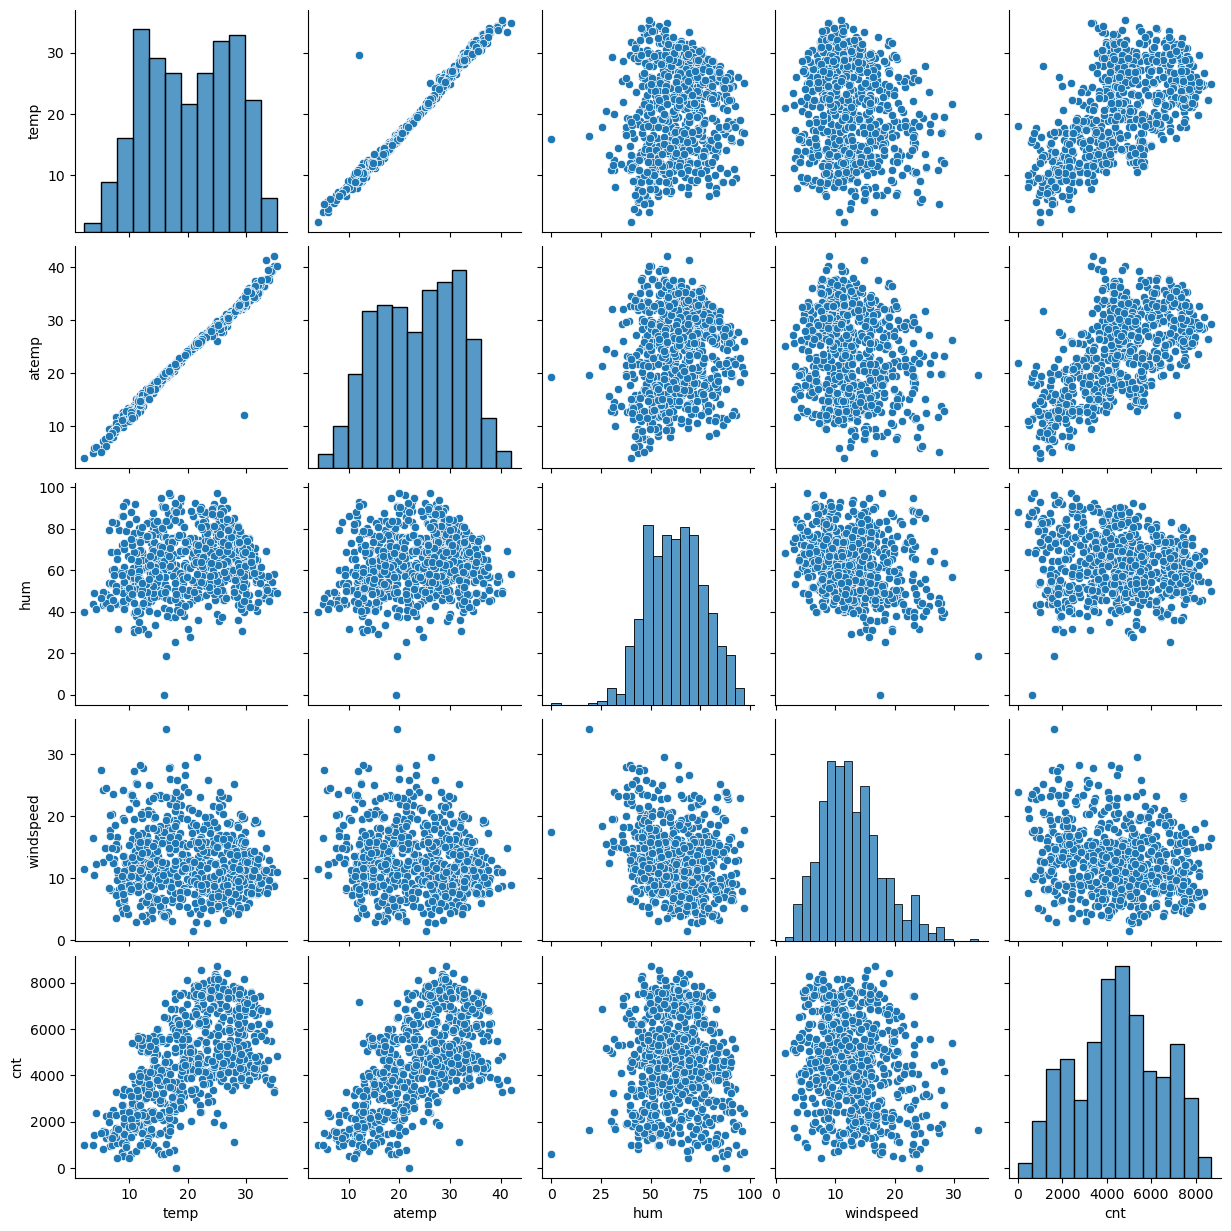

In [196]:
#Pair plot
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

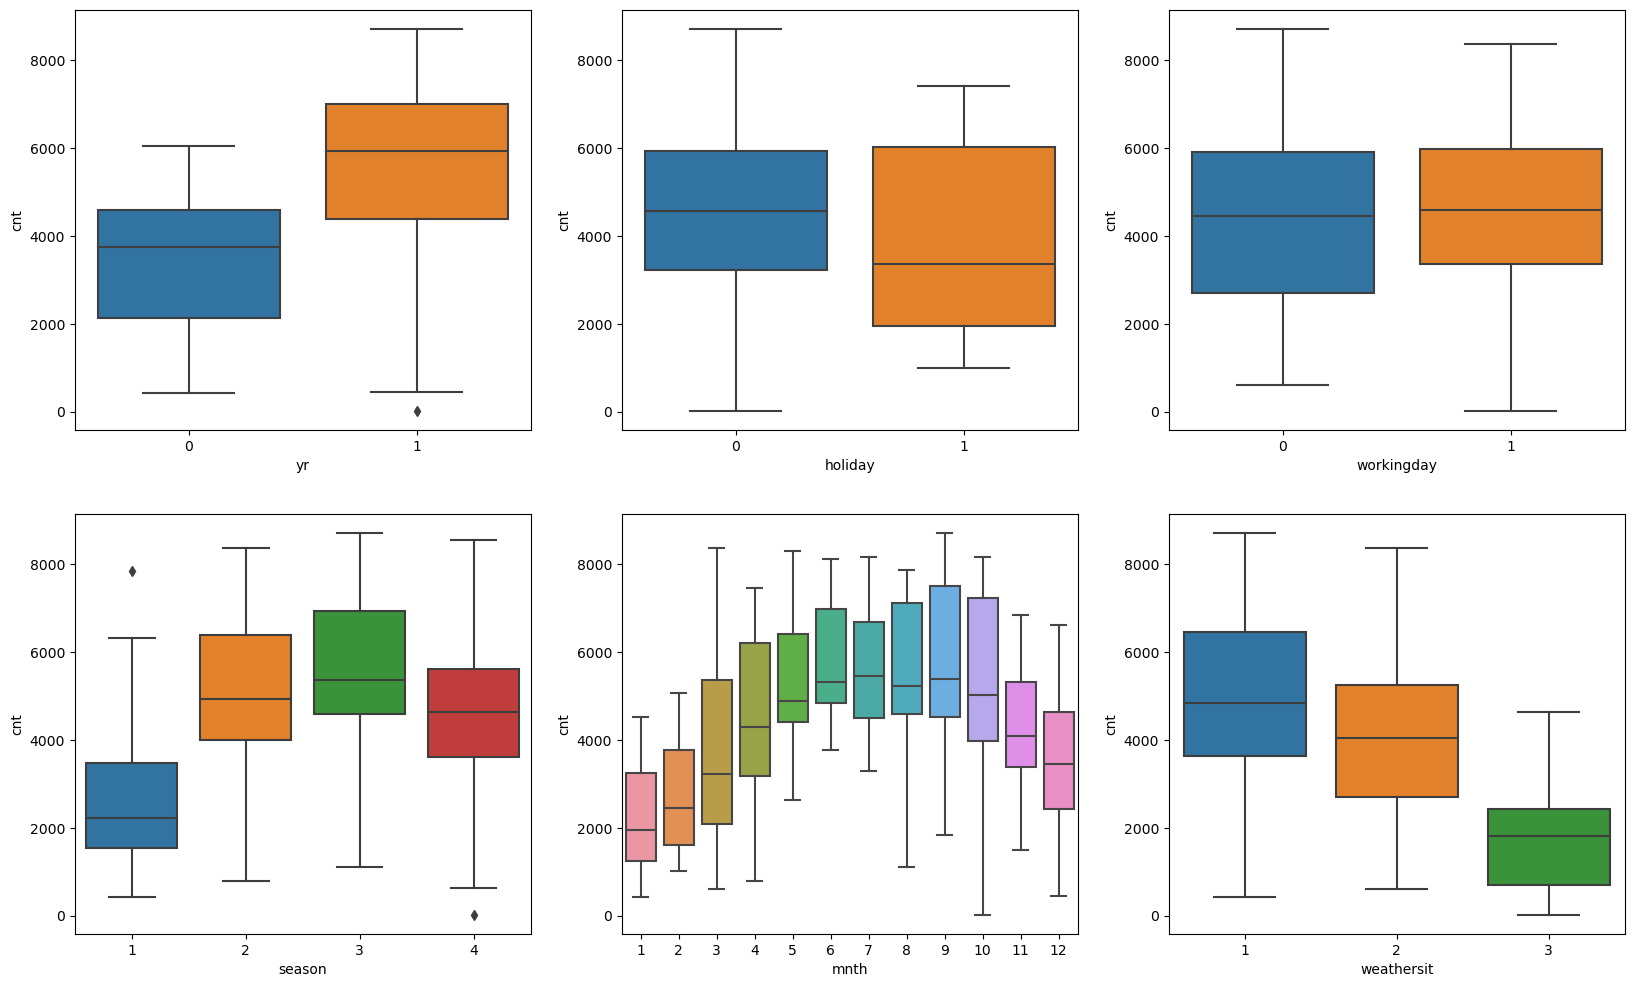

In [201]:
#Create Bar Graphs for Categorical variables
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x='mnth', y='cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data = bike)

In [100]:
#Convert the Seasons column into Dummy Variables

In [101]:
seasons = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [102]:
bike['season'] = bike['season'].map(seasons)

In [103]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [104]:
seasons_dummies = pd.get_dummies(bike['season'], drop_first= True )
seasons_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [105]:
bike = pd.concat([bike, seasons_dummies], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [106]:
#Drop Season colum
bike = bike.drop('season', axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [107]:
#Similarly need to do the same for 'weathersit' and 'weekday' and 'mnth' columns

In [108]:
#weathersit
weathersit_map = {1: 'Clear/Partly Cloudy', 2: 'Mist', 3: 'Light Snow/Rain'}
bike['weathersit'] = bike['weathersit'].map(weathersit_map)
weathersit_dummies = pd.get_dummies(bike['weathersit'], drop_first= True )
bike = pd.concat([bike, weathersit_dummies], axis = 1)
bike = bike.drop('weathersit', axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow/Rain,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [109]:
#mnth
months_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bike['mnth'] = bike['mnth'].map(months_map)
months_dummies = pd.get_dummies(bike['mnth'], drop_first= True )
bike = pd.concat([bike, months_dummies], axis = 1)
bike = bike.drop('mnth', axis = 1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [110]:
#weekday
weekday_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
bike['weekday'] = bike['weekday'].map(weekday_map)
weekday_dummies = pd.get_dummies(bike['weekday'], drop_first= True )
bike = pd.concat([bike, weekday_dummies], axis = 1)
bike = bike.drop('weekday', axis = 1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


# Step 3
- Create Train and Test Data

In [111]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


# Rescaling of Variables using Min-Max Scaling(Normalisation)

In [112]:
scaler = MinMaxScaler()

In [113]:
#Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [114]:
#Fit the Data
# 2 ways:
# 1. fit() : learns xmax, xmin
#    transform() = (x-xmin)/(xmax-xmin) 
# 2. fit_transform() : combination of fit() and transform()
# Way 1 will be used for Test Data and Way 2 for Train Data

In [115]:
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#To check if table is properly scaled, check if max values of all variables is 1 or not
bike_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4
- Train/Build the Model
- Approach : Start with all variable and then keep dropping variables

In [117]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Light Snow/Rain', 'Mist', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [118]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [119]:
#Build a model with all variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.81e-180
Time:                        12:59:30   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2433      0.035      6.887      0.000       0.174       0.313
yr                  0.2325      0.008     28.794      0.000       0.217       0.248
holiday             0.0109      0.024      0.451      0.652      -0.037       0.058
workingday          0.0963      0.012      7.835      0.000       0.072       0.120
temp                0.3880      0.142      2.727      0.007       0.108       0.668
atemp               0.0590      0.138      0.426      0.670      -0.213       0.331
hum                -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed          -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring             -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer              0.0424      0.026      1.617      0.107      -0.009       0.094
winter              0.1071      0.028      3.826      0.000       0.052       0.162
Light Snow/Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Mist               -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Aug                 0.0223      0.034      0.657      0.511      -0.044       0.089
Dec                -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb                -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan                -0.0631      0.034     -1.876      0.061      -0.129       0.003
July               -0.0327      0.035     -0.931      0.352      -0.102       0.036
June                0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                 0.0016      0.025      0.063      0.950      -0.047       0.050
May                 0.0255      0.021      1.208      0.228      -0.016       0.067
Nov                -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                 0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                 0.0868      0.032      2.711      0.007       0.024       0.150
Mon                -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat                 0.0952      0.014      6.910      0.000       0.068       0.122
Sun                 0.0410      0.014      2.929      0.004       0.013       0.068
Thu                -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue                -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed                -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11

#### Which variables to drop?
- First Calculate VIF of all variables

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
24,Sat,19.71
25,Sun,18.34
7,spring,10.77
9,winter,9.46
8,summer,8.29
20,Nov,6.79
21,Oct,6.47


#### Now check which have both High P and High VIF value
- As we can see 'atemp' variable has both high P value and VIF value, so drop it and calculate VIF again

In [121]:
#Drop 'atemp'
X = X_train.drop('atemp', axis = 1)

In [122]:
#Create another model without atemp
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.00e-181
Time:                        12:59:31   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2431      0.035      6.888      0.000       0.174       0.312
yr                  0.2324      0.008     28.819      0.000       0.217       0.248
holiday             0.0100      0.024      0.418      0.676      -0.037       0.057
workingday          0.0962      0.012      7.835      0.000       0.072       0.120
temp                0.4454      0.046      9.628      0.000       0.354       0.536
hum                -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed          -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring             -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer              0.0430      0.026      1.645      0.101      -0.008       0.094
winter              0.1076      0.028      3.853      0.000       0.053       0.163
Light Snow/Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist               -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Aug                 0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                -0.0633      0.034     -1.885      0.060      -0.129       0.003
July               -0.0338      0.035     -0.969      0.333      -0.102       0.035
June                0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                 0.0013      0.025      0.052      0.959      -0.047       0.050
May                 0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                 0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                 0.0859      0.032      2.692      0.007       0.023       0.149
Mon                -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat                 0.0956      0.014      6.958      0.000       0.069       0.123
Sun                 0.0413      0.014      2.964      0.003       0.014       0.069
Thu                -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue                -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed                -0.0055      0.015     -0.368      0.713      -0.035       0.024
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.46e+16


In [123]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,workingday,85.54
23,Sat,19.71
24,Sun,18.34
6,spring,10.75
8,winter,9.44
7,summer,8.27
3,temp,7.08
19,Nov,6.79
20,Oct,6.47
11,Aug,6.36


##### Since there are large no of variables we can go for RFE(Recursive Feature Elimination) to eliminate variables


In [124]:
lm = LinearRegression()
lm.fit(X, y_train)
rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X, y_train)

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 17),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light Snow/Rain', False, 3),
 ('Mist', False, 14),
 ('Aug', False, 8),
 ('Dec', False, 9),
 ('Feb', False, 6),
 ('Jan', False, 2),
 ('July', False, 18),
 ('June', False, 15),
 ('Mar', False, 10),
 ('May', False, 7),
 ('Nov', False, 13),
 ('Oct', False, 4),
 ('Sep', False, 11),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', False, 16),
 ('Thu', False, 12),
 ('Tue', False, 19)]

In [126]:
col = X.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Snow/Rain', 'Sat', 'Sun'],
      dtype='object')

In [127]:
col_d = X.columns[~rfe.support_] #Columns to drop
col_d

Index(['summer', 'winter', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [128]:
#Create X_test DF with RFE Selected variables
X_train_rfe = X[col]


In [129]:
#Add constant var
X_train_rfe = sm.add_constant(X_train_rfe)


In [130]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [131]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.11e-175
Time:                        12:59:34   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3293      0.024     13.474      0.000       0.281       0.377
yr                  0.2318      0.009     26.286      0.000       0.214       0.249
holiday             0.0310      0.023      1.361      0.174      -0.014       0.076
workingday          0.1091      0.010     11.087      0.000       0.090       0.128
temp                0.3908      0.025     15.851      0.000       0.342       0.439
hum                -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed          -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring             -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Light Snow/Rain    -0.2007      0.027     -7.414      0.000      -0.254      -0.148
Sat                 0.1187      0.012      9.750      0.000       0.095       0.143
Sun                 0.0705      0.013      5.593      0.000       0.046       0.095
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                     2.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Now we can see holiday is the variable with P value > 0.05. We can drop it and calculate R square value again

In [132]:
#Drop 'holiday'
X2 = X_train_rfe.drop('holiday', axis = 1)

In [133]:
#Create another model without holiday
X_train_sm = sm.add_constant(X2)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.11e-175
Time:                        12:59:35   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3603      0.040      9.043      0.000       0.282       0.439
yr                  0.2318      0.009     26.286      0.000       0.214       0.249
workingday          0.0781      0.028      2.801      0.005       0.023       0.133
temp                0.3908      0.025     15.851      0.000       0.342       0.439
hum                -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed          -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring             -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Light Snow/Rain    -0.2007      0.027     -7.414      0.000      -0.254      -0.148
Sat                 0.0877      0.029      2.975      0.003       0.030       0.146
Sun                 0.0395      0.030      1.333      0.183      -0.019       0.098
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,83.78
2,workingday,8.97
8,Sat,6.00
9,Sun,5.69
3,temp,1.63
6,spring,1.62
4,hum,1.21
5,windspeed,1.13
7,Light Snow/Rain,1.10
1,yr,1.03


In [135]:
#Drop 'Sun' variable and run model again
X3 = X2.drop('Sun', axis = 1)

In [136]:
#Create another model without Sun
X_train_sm = sm.add_constant(X3)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     268.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.02e-175
Time:                        12:59:35   Log-Likelihood:                 463.50
No. Observations:                 510   AIC:                            -909.0
Df Residuals:                     501   BIC:                            -870.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3928      0.032     12.467      0.000       0.331       0.455
yr                  0.2319      0.009     26.281      0.000       0.215       0.249
workingday          0.0445      0.012      3.740      0.000       0.021       0.068
temp                0.3918      0.025     15.887      0.000       0.343       0.440
hum                -0.2137      0.033     -6.505      0.000      -0.278      -0.149
windspeed          -0.1978      0.027     -7.230      0.000      -0.252      -0.144
spring             -0.1554      0.013    -12.008      0.000      -0.181      -0.130
Light Snow/Rain    -0.2005      0.027     -7.398      0.000      -0.254      -0.147
Sat                 0.0542      0.015      3.525      0.000       0.024       0.084
==============================================================================
Omnibus:                       51.529   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.931
Skew:                          -0.603   Prob(JB):                     2.00e-22
Kurtosis:                       4.802   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#Calculate VIF now
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,83.78
2,workingday,8.97
8,Sat,6.00
3,temp,1.63
6,spring,1.62
4,hum,1.21
5,windspeed,1.13
7,Light Snow/Rain,1.10
1,yr,1.03


##### All VIF values < 10, and also P values < 0.05. Hence seems a good training model

# Step 5:
- Residual Analysis

In [138]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.781178
426    0.509548
728    0.327796
482    0.688833
111    0.336765
         ...   
578    0.825461
53     0.246129
350    0.335328
79     0.351376
520    0.698186
Length: 510, dtype: float64

<Axes: ylabel='Density'>

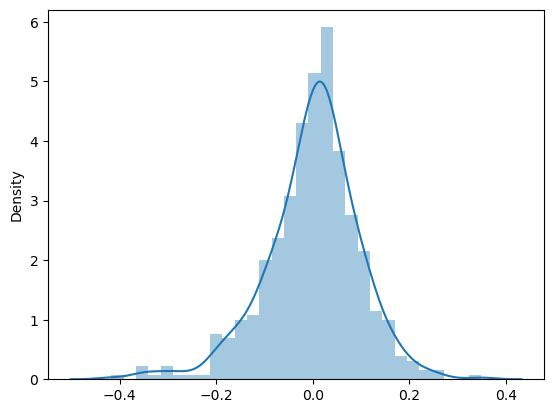

In [139]:
residual = (y_train - y_train_pred)
sns.distplot(residual)


# Step 6:
- Predictions and Evaluation on the Test Set
- We never fit() on test set. Test set is supposed to be unseen data. So we just transform() the Test data set

In [140]:
#Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [141]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [142]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [143]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [144]:
#Drop Insignificant Columns
drop_list = ["yr", "workingday", "temp", "hum", "windspeed", "spring", "Light Snow/Rain", "Sat", "const"]
X_test_sm = X_test_sm.drop(X_test_sm.columns.difference(drop_list), axis = 1)
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,spring,Light Snow/Rain,Sat
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0
535,1.0,1,1,0.901354,0.610133,0.153728,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0


In [145]:
#Predict
y_test_pred = lr_model.predict(X_test_sm)

# R-squared score on the test set

In [146]:
r2_score(y_test, y_test_pred)

0.8005000364100178